# KAN-CDSCO2004U  Machine Learning and Deep Learning

## Lab 3: K-Means & DBSCAN
**Estimated time: 1 hour**

### Learning Objectives
By the end of this exercise, you will be able to:
- Understand the fundamentals of **Unsupervised Learning** and when to use it
- Apply **K-Means** clustering and tune the number of clusters using the **Elbow Method** and **Silhouette Score**
- Understand and apply **DBSCAN** for density-based clustering
- Compare the strengths and limitations of each algorithm

In this exercise, you will explore **unsupervised learning** techniques covered in Lecture 3. You will cluster a real-world dataset using two different algorithms and learn when each one shines.

**How to work through this notebook:**
- 🏃 **RUN** cells = Just execute the code to see the output
- ✏️ **TODO** cells = Write your own code or answer questions
- 📖 **READ** cells = Explanations to help you understand the concepts

---
## Setup

🏃 **RUN** the cell below to import libraries.

In [2]:
# Import needed libraries
# Author: Luca Gudi (lgg.digi@cbs.dk)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Clustering algorithms
from sklearn.cluster import KMeans, DBSCAN

# Evaluation metrics
from sklearn.metrics import silhouette_score

# Display options
plt.rcParams['figure.figsize'] = (10, 6)

---
## 1. Examine the Data

📖 **READ**: In this session we'll be working with the **Seeds dataset**. It contains measurements of seeds from three varieties of wheat (Kama, Rosa, Canadian — 70 each).

The columns are:
- `area` — area of the seed (A)
- `perimeter` — perimeter of the seed (P)
- `compactness` — C = 4 × π × A / P²
- `length` — length of the kernel
- `width` — width of the kernel
- `asymmetry` — asymmetry coefficient
- `groove_length` — length of kernel groove
- `variety` — wheat variety (Kama, Rosa, Canadian)

🏃 **RUN** the cells below to load and explore the data.

In [3]:
# Load the Seeds dataset
df = pd.read_csv("https://raw.githubusercontent.com/nick-edu/dmmldl/master/Seeds.csv")
print(f"Dataset shape: {df.shape}")
df.head(7)

Dataset shape: (210, 8)


,area,perimeter,compactness,length,width,asymmetry,groove_length,variety
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1
5,14.38,14.21,0.8951,5.386,3.312,2.462,4.956,1
6,14.69,14.49,0.8799,5.563,3.259,3.586,5.219,1


✏️ **TODO**: Examine the relationships between variables using a scatter matrix.

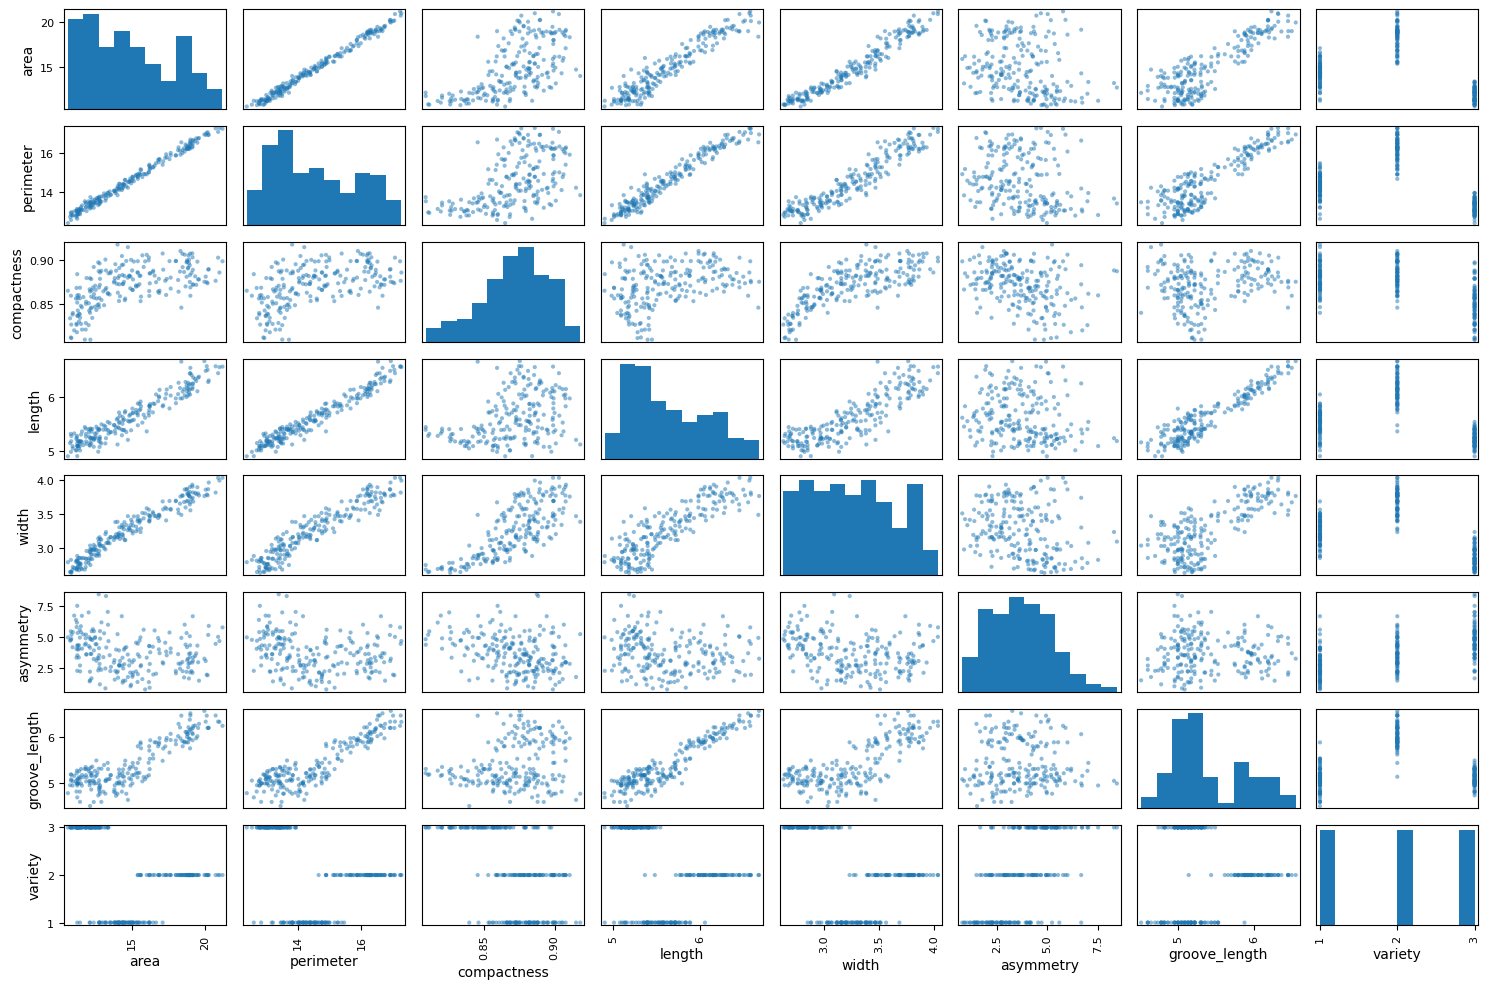

In [4]:
# TODO: Plot a scatter matrix of the dataset
from pandas.plotting import scatter_matrix
scatter_matrix(df, figsize=(15, 10))
plt.tight_layout()
plt.show()

---
## 2. K-Means Clustering

📖 **READ**:
K-Means is one of the simplest and most popular clustering algorithms. It works by:
1. Placing **k centroids** randomly
2. **Assigning** each data point to the nearest centroid
3. **Updating** centroids to the mean of their assigned points
4. Repeating steps 2–3 until centroids **stop moving** (convergence)

It is **fast and scalable**, but assumes **spherical, similarly-sized clusters** and requires you to **specify k** in advance.

### 2.1 Basic K-Means

✏️ **TODO**: Perform K-Means clustering with 3 clusters on `width` and `groove_length`.

In [5]:
# TODO: Perform k-means clustering with 3 clusters
X = df[["width", "groove_length"]]
km = KMeans(n_clusters=3, random_state=1)
km.fit(X)

KMeans(n_clusters=3, random_state=1)

🏃 **RUN** the cells below to inspect the cluster labels and visualize the result.

In [6]:
# See the resulting cluster labels
print("Cluster labels:", km.labels_)
print("\nCluster sizes:", np.unique(km.labels_, return_counts=True))

Cluster labels: [1 1 1 1 1 1 1 1 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2
 2 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 2 2 0
 2 2 2 0 0 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 2 2 0 0 0 2 0 2 0 2 2
 0 0 0 0 0 2 0 0 0 0 2 2 0 1 0 0 2 0 2 0 0 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]

Cluster sizes: (array([0, 1, 2], dtype=int32), array([ 42, 135,  33]))


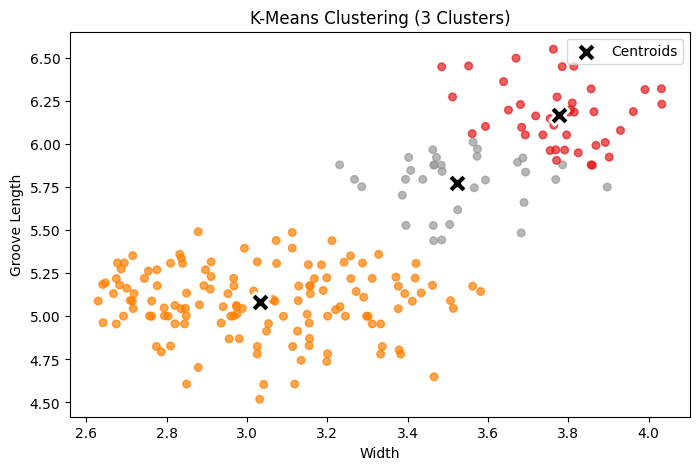

Inertia (WCSS): 16.74


In [7]:
# Add cluster labels to the dataframe and plot
df['cluster'] = km.labels_

plt.figure(figsize=(8, 5))
plt.scatter(X["width"], X["groove_length"], c=km.labels_, cmap='Set1', s=30, alpha=0.7)
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],
            c='black', marker='X', s=200, edgecolors='white', linewidths=2, label='Centroids')
plt.xlabel("Width")
plt.ylabel("Groove Length")
plt.title("K-Means Clustering (3 Clusters)")
plt.legend()
plt.show()

print(f"Inertia (WCSS): {km.inertia_:.2f}")

### ✏️ TODO: Answer the following questions

**Q1: What do the X markers represent? What is "Inertia (WCSS)" and why do we want it to be low?**

Your answer: The X markers are the centroids (cluster centers) — the mean position of all points assigned to each cluster. Inertia is the Within-Cluster Sum of Squares — the sum of squared distances from each point to its assigned centroid. Lower inertia means tighter, more compact clusters.

### 2.2 K-Means Helper Function

✏️ **TODO**: Create a reusable helper function that performs K-Means and plots the results.

In [8]:
# TODO: Create a helper function to cluster and plot the data.
# Hints: Performs k-means clustering and plots the resulting clusters
# Arguments: col1, col2 -- columns to cluster and plot
#            nClusters -- number of clusters to look for

def KmeansAndPlot(col1, col2, nClusters=3):
    """
    Performs k-means clustering and plots the resulting clusters.

    Arguments:
    col1, col2 -- columns to cluster and plot
    nClusters -- number of clusters to look for
    """
    # Put the columns together into one dataframe
    X = pd.concat([col1, col2], axis=1)
    # Instantiate and run k-means
    km = KMeans(n_clusters=nClusters, random_state=1)
    km.fit(X)
    labels = km.labels_

    # Plot the data, coloring points based on the cluster
    plt.figure(figsize=(8, 5))
    plt.scatter(col1, col2, c=labels, cmap='Set1', s=30, alpha=0.7)
    plt.title(f"K-Means, {nClusters} clusters")
    plt.xlabel(col1.name)
    plt.ylabel(col2.name)
    plt.show()

✏️ **TODO**: Use your function to cluster and plot different variable combinations.

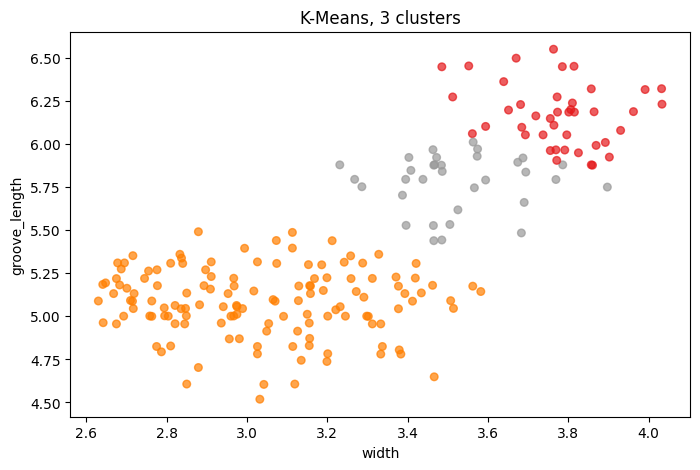

In [9]:
# TODO: Use your function to perform clustering and plot the results.
KmeansAndPlot(df.width, df.groove_length)

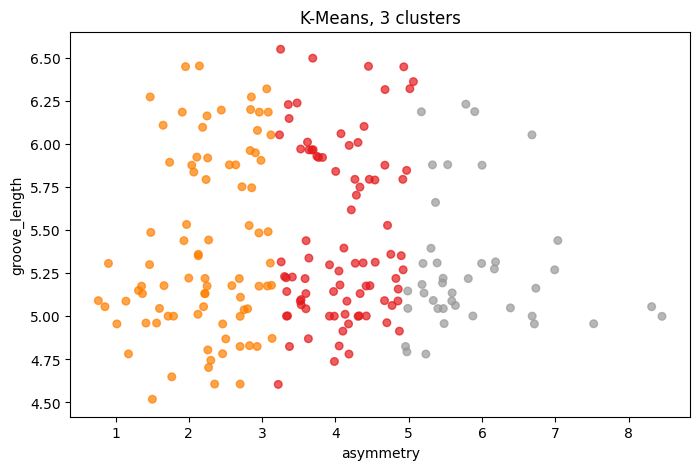

In [10]:
# TODO: Cluster on other variables: `asymmetry` and `groove_length`.
KmeansAndPlot(df.asymmetry, df.groove_length)

### ✏️ TODO: Answer

**Q2: Do the clusters look different when using `asymmetry` and `groove_length` compared to `width` and `groove_length`? Why might that be?**

Your answer: Yes, the clusters look quite different. The choice of features affects clustering because K-Means groups points by distance — features that separate the data well (like `width` vs. `groove_length`) produce cleaner clusters, while features with more overlap (like `asymmetry`) make it harder to find distinct groups.

---
## 3. Finding the Optimal k: Elbow Method & Silhouette Score

📖 **READ**:
- The **Elbow Method** plots the inertia (WCSS) for different values of k. The "elbow" point — where adding more clusters gives diminishing returns — suggests the optimal k.
- The **Silhouette Score** measures how similar a point is to its own cluster vs. neighboring clusters:
  - **(b − a) / max(a, b)** where **a** = mean distance to same cluster, **b** = mean distance to nearest other cluster
  - Ranges from **−1** (wrong cluster) to **+1** (well-clustered)

✏️ **TODO**: Run the code below and identify the optimal k.

/Users/lucagudi/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/lucagudi/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/lucagudi/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/lucagudi/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/lucagudi/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/lucagudi/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/lucagudi/Library/Python/3.9/lib/python/site-packages/sklearn/util

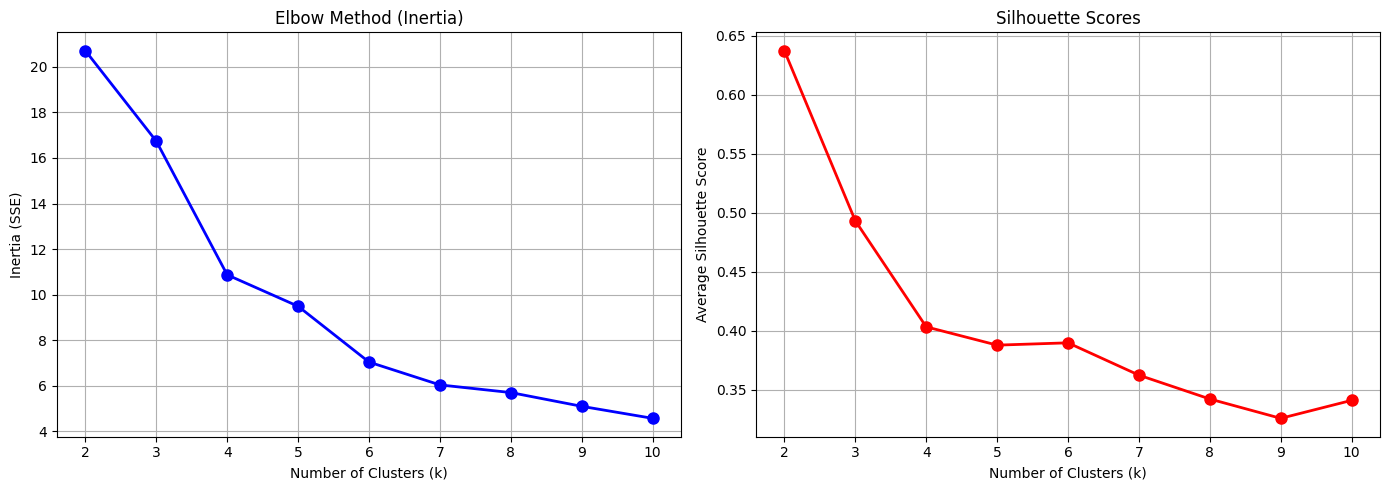

In [11]:
from sklearn.metrics import silhouette_score

def plot_elbow_silhouette(X, k_min=2, k_max=10):
    """
    Plots the Elbow (inertia) curve and Silhouette scores
    for K-Means over a range of cluster counts.
    """
    inertias = []
    silhouettes = []
    ks = range(k_min, k_max + 1)

    for k in ks:
        km = KMeans(n_clusters=k, random_state=1)
        labels = km.fit_predict(X)
        inertias.append(km.inertia_)
        silhouettes.append(silhouette_score(X, labels))

    fig, axes = plt.subplots(1, 2, figsize=(14, 5))

    axes[0].plot(ks, inertias, 'bo-', linewidth=2, markersize=8)
    axes[0].set_title("Elbow Method (Inertia)")
    axes[0].set_xlabel("Number of Clusters (k)")
    axes[0].set_ylabel("Inertia (SSE)")
    axes[0].grid(True)

    axes[1].plot(ks, silhouettes, 'ro-', linewidth=2, markersize=8)
    axes[1].set_title("Silhouette Scores")
    axes[1].set_xlabel("Number of Clusters (k)")
    axes[1].set_ylabel("Average Silhouette Score")
    axes[1].grid(True)

    plt.tight_layout()
    plt.show()

# Run on width & groove_length
X = df[['width', 'groove_length']]
plot_elbow_silhouette(X, k_min=2, k_max=10)

### ✏️ TODO: Answer

**Q3: At which value of k does the "elbow" appear? Does the Silhouette Score agree?**

Your answer: The elbow appears around k=4, where the inertia curve flattens out. The Silhouette Score does not clearly agree, it is highest at k=2 and generally decreases as k increases, though it stabilizes somewhat around k=4–6. The two methods don't fully align here because we're only clustering on 2 features (width and groove_length), which may not capture the full structure of the data. Given domain knowledge (3 wheat varieties), k=3 is also a reasonable choice.


---
## 4. DBSCAN — Density-Based Clustering

📖 **READ**:
**DBSCAN** identifies clusters as regions of **high density** separated by regions of **low density**. Unlike K-Means, it:
- Does **NOT** require specifying the number of clusters
- Can find clusters of **arbitrary shape**
- Naturally detects **outliers/noise**

Key parameters:
- **`eps` (ε)**: Maximum radius of the neighborhood
- **`min_samples`**: Minimum number of points in the ε-neighborhood to be a **core point**

Point types:
- **Core point**: Has ≥ `min_samples` points within `eps` distance
- **Border point**: Within `eps` of a core point, but fewer than `min_samples` neighbors
- **Noise point**: Neither core nor border — an **outlier** (labelled as `-1`)

### 4.1 DBSCAN Helper Function

✏️ **TODO**: Implement a helper function that performs DBSCAN and plots the resulting clusters.

In [12]:
# TODO: Implement a helper function for DBSCAN
# Arguments: col1, col2, minSamples, eps

def DbscanAndPlot(col1, col2, minSamples=5, eps=0.5):
    """
    Performs DBSCAN clustering and plots the resulting clusters.

    Arguments:
    col1, col2 -- columns to cluster and plot
    minSamples -- minimum samples in neighborhood
    eps -- neighborhood radius
    """
    X = pd.concat([col1, col2], axis=1)
    dbs = DBSCAN(min_samples=minSamples, eps=eps)
    dbs.fit(X)
    labels = dbs.labels_

    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise = list(labels).count(-1)

    plt.figure(figsize=(8, 5))
    plt.scatter(col1, col2, c=labels, cmap='Accent', s=30, alpha=0.7)
    plt.title(f"DBSCAN — min_samples={minSamples}, eps={eps}, clusters={n_clusters}, noise={n_noise}")
    plt.xlabel(col1.name)
    plt.ylabel(col2.name)
    plt.show()

### 4.2 Applying DBSCAN

✏️ **TODO**: Use your function to perform DBSCAN on `length` and `groove_length`.

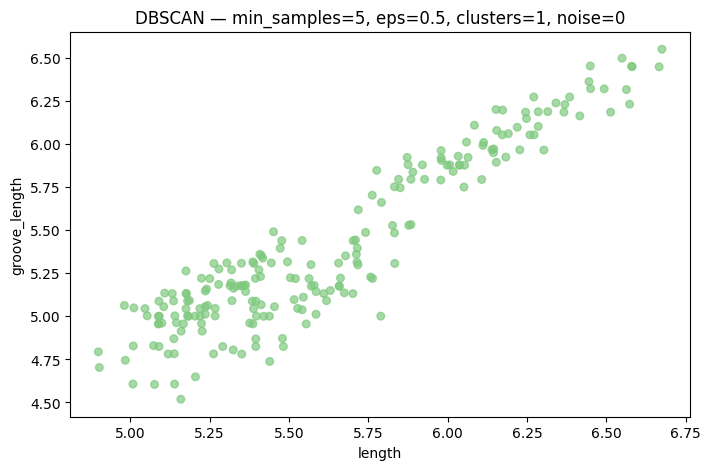

In [13]:
# TODO: DBSCAN on length and groove_length
DbscanAndPlot(df.length, df.groove_length)

### 4.3 Effect of the `eps` Parameter

📖 **READ**: Choosing the right `eps` is crucial:
- **Too small** → Most points become noise
- **Too large** → Separate clusters merge into one

✏️ **TODO**: Now vary the `eps` parameter to 0.05. How does this affect the results?

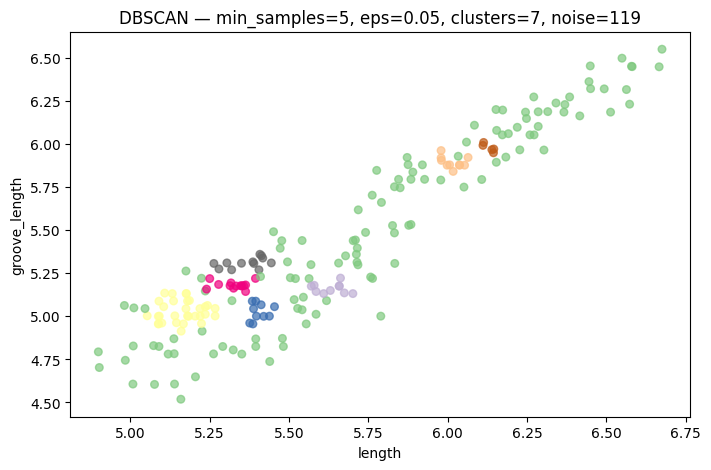

In [14]:
# TODO: Try eps = 0.05 — what changes?
DbscanAndPlot(df.length, df.groove_length, eps=0.05)

### ✏️ TODO: Answer

**Q4: How does changing `eps` from 0.5 to 0.05 affect the results? Why?**

Your answer: With eps=0.05, the neighborhood radius is much smaller, so very few points have enough neighbors to form clusters. Most points get classified as noise (-1). The algorithm finds many tiny clusters or none at all. With eps=0.5, the neighborhoods are large enough to connect nearby points into meaningful clusters.

### 4.4 DBSCAN on All Features

✏️ **TODO**: Apply DBSCAN to `length` and `groove_length` manually (without the helper function) and inspect the labels.

In [15]:
# TODO: Instantiate DBSCAN and perform clustering
# TODO: Also obtain labels for the resulting clusters

X = pd.concat([df.length, df.groove_length], axis=1)

# Instantiate DBSCAN
dbs = DBSCAN(min_samples=5, eps=0.5)

# Perform clustering
dbs.fit(X)

# Obtain labels
labels = dbs.labels_

print("Cluster labels:", labels)
print(f"\nClusters found: {len(set(labels)) - (1 if -1 in labels else 0)}")
print(f"Noise points: {list(labels).count(-1)}")

Cluster labels: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]

Clusters found: 1
Noise points: 0


### ✏️ TODO: Answer

**Q5: What are the pros and cons of DBSCAN compared to K-Means?**

Your answer:

| | K-Means | DBSCAN |
| :--- | :--- | :--- |
| **Pros** | Fast, scalable, easy to understand | Finds arbitrary shapes, handles noise, no need to specify k |
| **Cons** | Needs k in advance, spherical clusters only | Sensitive to eps/min_samples, struggles with varying densities |

---
## Summary

In this lab, you learned how to:

| Section | Technique | Python Code / sklearn Class |
| :--- | :--- | :--- |
| **2.1 K-Means** | Basic K-Means clustering | `KMeans(n_clusters=k)` |
| **2.2 Helper Function** | Reusable clustering + plotting | Custom function |
| **3. Elbow & Silhouette** | Finding optimal k | `kmeans.inertia_`, `silhouette_score(X, labels)` |
| **4.1 DBSCAN** | Density-based clustering | `DBSCAN(eps=0.5, min_samples=5)` |
| **4.3 eps Tuning** | Effect of eps parameter | `DBSCAN(eps=...)` |

**Key takeaways:**
- **K-Means**: Fast and simple, but needs k in advance and works best on spherical clusters
- **DBSCAN**: Finds arbitrary shapes and handles noise, but sensitive to eps and min_samples
- Use the **Elbow Method** and **Silhouette Score** to find the optimal number of clusters
- Always consider the **shape of your data** when choosing a clustering algorithm